# Data processing

Here I'm generating non-upsampled matrices from dataset without album duplicates. I'll read these files in python and upsample to 16.

In [70]:
setwd("/home/pasoneto/Documents/github/doc_suomi/code")
source("utils.R")
source("data_cook.R")
cat(howto_data)

`summarise()` regrouping output by 'album_id' (override with `.groups` argument)



How to use datasets

call    base()        for real values
call    z_scored()    for normalized
call    min_maxed()   for normalized2

In [75]:
dt = min_maxed()

In [84]:
dissim_gen = function(data){
    dt <- split(data, data$album_id)
    for(i in 1:length(dt)) { 

        dt[[i]] = tidyr::pivot_wider(dt[[i]], 
                  names_from = album_id, 
                  values_from = c(valence, energy, loudness, tempo)) 

        dt[[i]] = dt[[i]][, 4:7]

        dt[[i]] <- as.matrix(dt[[i]]) 

        dt[[i]] <- as.matrix(daisy(dt[[i]]))

        dt[[i]][dt[[i]] == 0] <- NA

    }
    return(dt)
}

In [85]:
lista = dissim_gen(dt)

In [87]:
setwd("/home/pasoneto/Documents/github/doc_suomi/code/data_processing/dissimilarity_matrices")
for(i in 1:length(lista)){
    write.csv(lista[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
}
################# Processing handled to upsampling_python.ipynb
################# results are imported below

## Calculating means for upsampled matrices

Import from folder modified by python (upsampling_python.ipynb)

In [190]:
path = "/home/pasoneto/Documents/github/doc_suomi/code/data_processing/dissimilarities/dissimilarity_matrices_upsampled/"
file_list <- list.files(path=path)
matrices = c()

for(i in 1:length(file_list)){
    file = paste(path, file_list[i], sep = "")
    matrices[[i]] = as.matrix(fread(file, header = TRUE))
}

# Removing broken item on the list
for(i in 1:length(matrices)){
    val = dim(matrices[[i]])[1] + dim(matrices[[i]])[2] 
    if(val != 32){
        print(i)
    }
}
matrices[[5416]] <- NULL

In [229]:
dt = apply(simplify2array(matrices), 1:2, function(x){mean(x, na.rm = TRUE)})

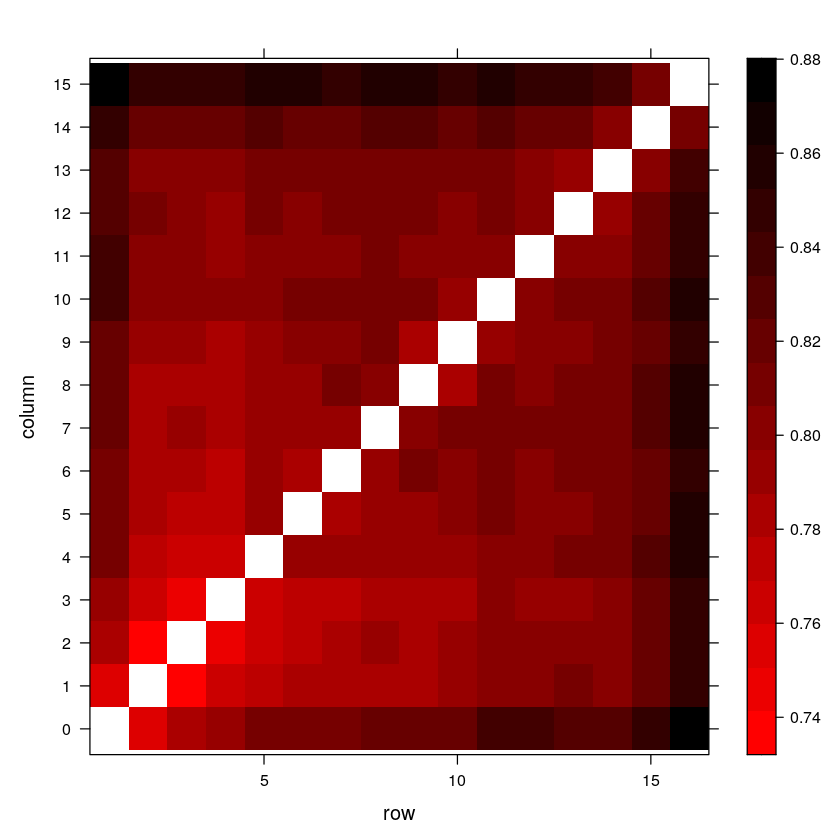

In [230]:
redblack = colorRampPalette(c("red", "black"))(100)
levelplot(dt, col.regions = redblack)